In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale
import os

# FINESST plotting

Graph Archaea full distribution as KEGG sample fragments

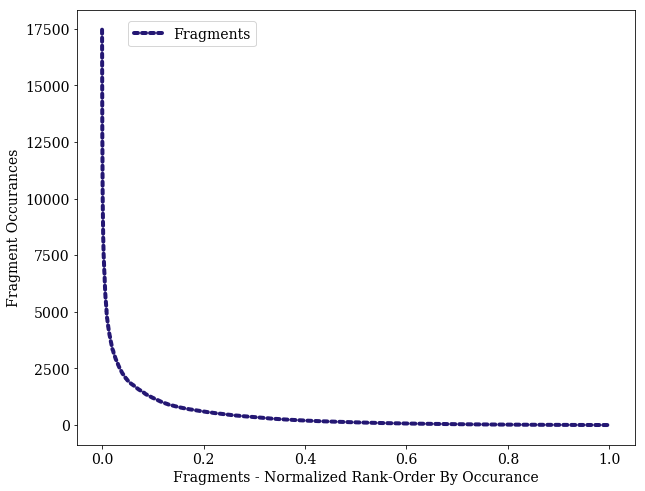

In [4]:
plt.rcParams.update({"font.size":14})
plt.rcParams.update({"font.family":"serif"})

plt.figure(figsize=(10,8))
archaea_df = pd.read_csv("Biology/Data/Archaea/Archaea0_fullOccurances.csv")

occurances = archaea_df["Occurances"].tolist()
yvals = sorted(list(map(int, occurances)), reverse=True)#, reverse=True)
#xvals = range(0, len(yvals))
xvals = np.linspace(0, 1, num=len(yvals))

plt.plot(xvals, yvals, linewidth=4, color="#241773", linestyle = "-", dashes=(1, 1.), 
         dash_capstyle="round", label="Biochemical Fragments")


plt.ylabel("Fragment Occurances")
plt.xlabel("Fragments - Normalized Rank-Order By Occurance")
plt.legend(bbox_to_anchor=(0.08, 0.99))

# GeoMicroBio proposal

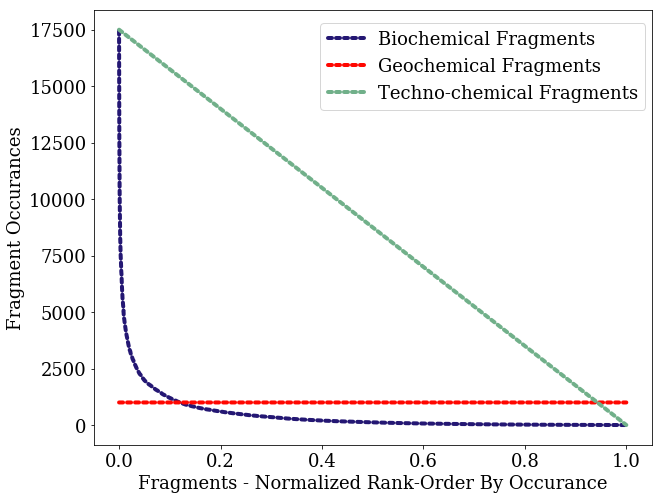

In [28]:
plt.rcParams.update({"font.size":18})
plt.rcParams.update({"font.family":"serif"})

plt.figure(figsize=(10,8))
archaea_df = pd.read_csv("Biology/Data/Archaea/Archaea0_fullOccurances.csv")

occurances = archaea_df["Occurances"].tolist()
yvals = sorted(list(map(int, occurances)), reverse=True)#, reverse=True)
#xvals = range(0, len(yvals))
xvals = np.linspace(0, 1, num=len(yvals))

plt.plot(xvals, yvals, linewidth=4, color="#241773", linestyle = "-", dashes=(1, 1.), 
         dash_capstyle="round", label="Biochemical Fragments")

plt.plot(xvals, [1000]*len(occurances), linewidth=4, color="#FF0701", linestyle = "-", dashes=(1,1.),
        dash_capstyle="round", label = "Geochemical Fragments")

plt.plot(np.linspace(0,1,num=17500), np.arange(17500, 0, -1), linewidth=4, color="#71B08A", linestyle = "-", dashes=(1,1.),
        dash_capstyle="round", label = "Techno-chemical Fragments")

plt.ylabel("Fragment Occurances")
plt.xlabel("Fragments - Normalized Rank-Order By Occurance")
plt.legend(bbox_to_anchor=(0.39, 0.99))
plt.show()

# KEGG Samples Test

Test to see if different numbers of KEGG samples (1k-5k) result in different distributions

In [2]:
onek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv"
twok_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv"
threek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv"
fourk_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv"
fivek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_5000cpds_occurances.csv"
all_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_full_occurances_t01_smarts_unique.csv"
sample_labels = {"Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv": "1k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv": "2k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv": "3k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv": "4k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_5000cpds_occurances.csv": "5k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_full_occurances_t01_smarts_unique.csv": "Full KEGG"}

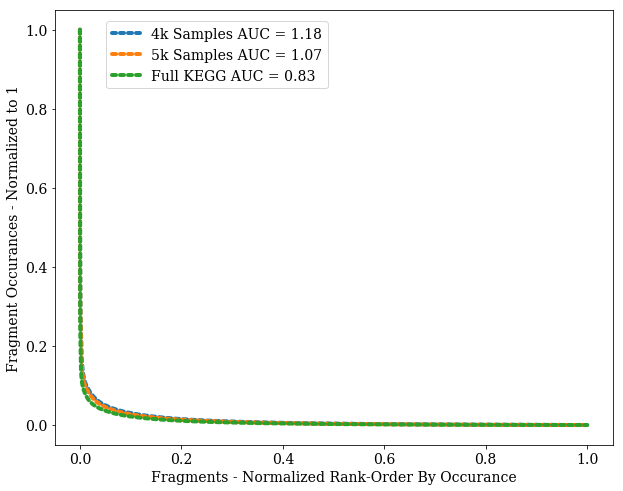

In [3]:
plt.rcParams.update({"font.size":14})
plt.rcParams.update({"font.family":"serif"})

plt.figure(figsize=(10,8))
for fp in [fourk_fp, fivek_fp, all_fp]:
    df = pd.read_csv(fp)
    occurances = df["Occurances"].tolist()
    
    #x & y vals, all normalized to 1
    yvals = sorted(list(map(int, occurances)), reverse=True)
    yvals = minmax_scale(yvals) #Normalize yvals to 1
    xvals = np.linspace(0, 1, num=len(yvals))
    
    #AUC calculations
    area = np.trapz(yvals, dx=xvals[1])

    #NOTE: AUC MULTIPLIED BY 100
    plt.plot(xvals, yvals, linewidth=4, linestyle = "-", dashes=(1, 1.), 
             dash_capstyle="round", label=sample_labels[fp] + " AUC = " + str(round(area*100,2)))
plt.ylabel("Fragment Occurances - Normalized to 1")
plt.xlabel("Fragments - Normalized Rank-Order By Occurance")
plt.legend(bbox_to_anchor=(0.08, 0.99))

# Timeout Parameter testing

Text(0.5,0,'Fragments - Normalized Rank-Order By Occurance')

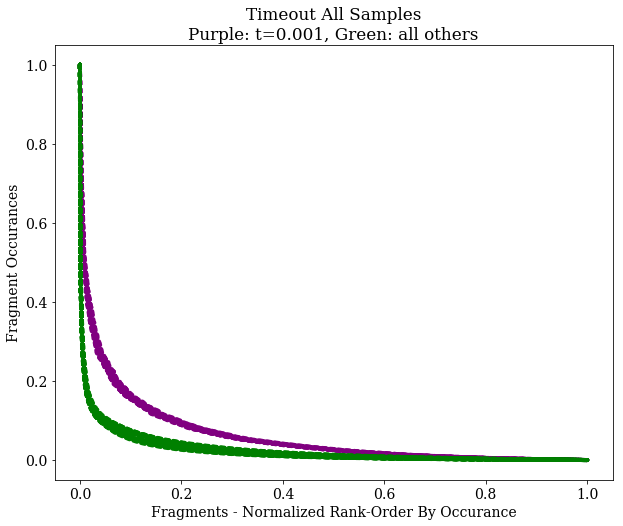

In [21]:
#Repetition testing
plt.rcParams.update({"font.size":14})
plt.rcParams.update({"font.family":"serif"})

plt.figure(figsize=(10,8))
count = 1
for f in os.listdir("Biology/Data/Tests/Timeout/"):
    for t in ["0_001_", "0_01_", "0_1_", "t1_"]:
        if t in f and f.endswith(".csv"):
            df = pd.read_csv("Biology/Data/Tests/Timeout/" + f)
            occurances = df["Occurances"].tolist()

            #x & y vals, all normalized to 1
            yvals = sorted(list(map(int, occurances)), reverse=True)
            yvals = minmax_scale(yvals) #Normalize yvals to 1
            xvals = np.linspace(0, 1, num=len(yvals))

            #AUC calculations
            area = np.trapz(yvals, dx=xvals[1])
            
            if t == "0_001_":
                plt.plot(xvals, yvals, linewidth=4, linestyle = "-", dashes=(1, 1.), 
                     dash_capstyle="round", color="purple")
            else:
                plt.plot(xvals, yvals, linewidth=4, linestyle = "-", dashes=(1, 1.), 
                     dash_capstyle="round", color="green")
                
            
            count += 1

plt.title("Timeout All Samples\nPurple: t=0.001, Green: all others")
plt.ylabel("Fragment Occurances")
plt.xlabel("Fragments - Normalized Rank-Order By Occurance")
#plt.legend(bbox_to_anchor=(0.08, 0.99))

# Domain Plotting

Normalized to 1, AUC included to compare across domains

In [19]:
archaea_fp = "Biology/Data/Archaea/Archaea0_fullOccurances.csv"
bacteria_fp = "Biology/Data/Bacteria/Bacteria0_fullOccurances.csv"
eukarya_fp = "Biology/Data/Eukarya/Eukarya0_fullOccurances.csv"
domain_labels = {"Biology/Data/Archaea/Archaea0_fullOccurances.csv": "Archaea",
                "Biology/Data/Bacteria/Bacteria0_fullOccurances.csv": "Bacteria",
                "Biology/Data/Eukarya/Eukarya0_fullOccurances.csv": "Eukarya"}

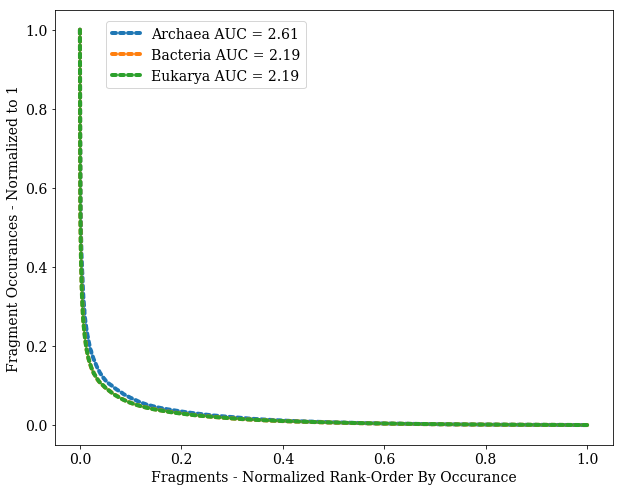

In [31]:
plt.rcParams.update({"font.size":14})
plt.rcParams.update({"font.family":"serif"})

plt.figure(figsize=(10,8))
for fp in [archaea_fp, bacteria_fp, eukarya_fp]:
    df = pd.read_csv(fp)
    occurances = df["Occurances"].tolist()
    
    #x & y vals, all normalized to 1
    yvals = sorted(list(map(int, occurances)), reverse=True)
    yvals = minmax_scale(yvals) #Normalize yvals to 1
    xvals = np.linspace(0, 1, num=len(yvals))
    
    #AUC calculations
    area = np.trapz(yvals, dx=xvals[1])

    #NOTE: AUC MULTIPLIED BY 100
    plt.plot(xvals, yvals, linewidth=4, linestyle = "-", dashes=(1, 1.), 
             dash_capstyle="round", label=domain_labels[fp] + " AUC = " + str(round(area*100,2)))
plt.ylabel("Fragment Occurances - Normalized to 1")
plt.xlabel("Fragments - Normalized Rank-Order By Occurance")
plt.legend(bbox_to_anchor=(0.08, 0.99))

# KEGG cpd classes

Graph all KEGG compound classes on the same plot (with variance outlined)

In [8]:
#File paths (relative) to all csv files containing fragments & occurances over full KEGG database
antbio_fp = "Biology/Data/Tests/Antibio_sampleOccurrances/0_fullOccurances.csv"
carb_fp = "Biology/Data/Tests/Carbs_sampleOccurrances/0_fullOccurances.csv"
hormtrans_fp = "Biology/Data/Tests/HormTrans_sampleOccurances/0_fullOccurances.csv"
lipid_fp = "Biology/Data/Tests/Lipid_sampleOccurances/0_fullOccurances.csv"
nucAcids_fp = "Biology/Data/Tests/NucAcids_sampleOccurances/0_fullOccurances.csv"
orgAcids_fp = "Biology/Data/Tests/OrgAcids_sampleOccurances/0_fullOccurances.csv"
peptides_fp = "Biology/Data/Tests/Peptides_sampleOccurances/0_fullOccurances.csv"
vitcofs_fp = "Biology/Data/Tests/VotsCofs_sampleOccurances/0_fullOccurances.csv"

In [9]:
#Label dictionary
label_dict = {"Biology/Data/Tests/Antibio_sampleOccurrances/0_fullOccurances.csv":"Antibiotics", 
             "Biology/Data/Tests/Carbs_sampleOccurrances/0_fullOccurances.csv": "Carbohydrates",
             "Biology/Data/Tests/HormTrans_sampleOccurances/0_fullOccurances.csv": "Hormones & Transmitters",
             "Biology/Data/Tests/Lipid_sampleOccurances/0_fullOccurances.csv": "Lipids",
             "Biology/Data/Tests/NucAcids_sampleOccurances/0_fullOccurances.csv": "Nucleic Acids",
             "Biology/Data/Tests/OrgAcids_sampleOccurances/0_fullOccurances.csv": "Organic Acids",
             "Biology/Data/Tests/Peptides_sampleOccurances/0_fullOccurances.csv": "Peptides",
             "Biology/Data/Tests/VotsCofs_sampleOccurances/0_fullOccurances.csv": "Vitamins & Cofactors"}

In [10]:
#Hex color dictionary
color_dict = {"Biology/Data/Tests/Antibio_sampleOccurrances/0_fullOccurances.csv":"#003f5c", 
             "Biology/Data/Tests/Carbs_sampleOccurrances/0_fullOccurances.csv": "#2f4b7c",
             "Biology/Data/Tests/HormTrans_sampleOccurances/0_fullOccurances.csv": "#665191",
             "Biology/Data/Tests/Lipid_sampleOccurances/0_fullOccurances.csv": "#a05195",
             "Biology/Data/Tests/NucAcids_sampleOccurances/0_fullOccurances.csv": "#d45087",
             "Biology/Data/Tests/OrgAcids_sampleOccurances/0_fullOccurances.csv": "#f95d6a",
             "Biology/Data/Tests/Peptides_sampleOccurances/0_fullOccurances.csv": "#ff7c43",
             "Biology/Data/Tests/VotsCofs_sampleOccurances/0_fullOccurances.csv": "#ffa600"}

#Color palette from: https://learnui.design/tools/data-color-picker.html#palette

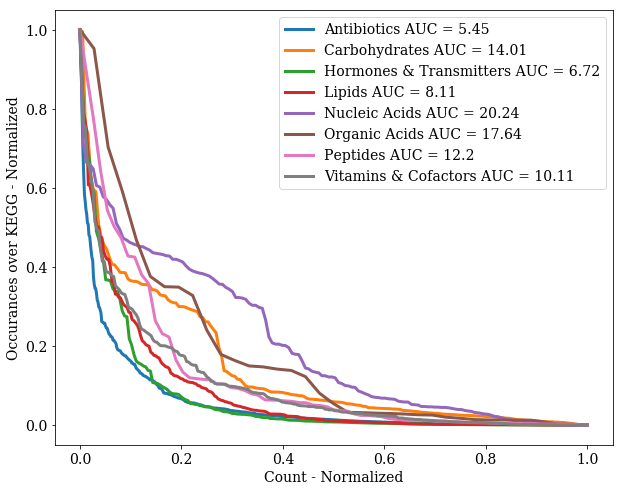

In [32]:
plt.figure(figsize=(10,8))

#Plot all classes on one space
for fp in [antbio_fp, carb_fp, hormtrans_fp, lipid_fp, nucAcids_fp, orgAcids_fp, peptides_fp, vitcofs_fp]:
    df = pd.read_csv(fp)
    
    occurances = df["Occurances"].tolist()
    yvals = sorted(list(map(int, occurances)), reverse=True)
    yvals = minmax_scale(yvals) #Normalize yvals to 1

    xvals = np.linspace(0, 1, num=len(yvals))
    
    #AUC calculations
    area = np.trapz(yvals, dx=xvals[1])
    
    plt.plot(xvals, yvals, linewidth=3, label=label_dict[fp] + " AUC = " + str(round(area*100,2)))

# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("Occurances over KEGG - Normalized")
plt.xlabel("Count - Normalized")
plt.legend()